In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# Read the dataset
df = pd.read_csv("../Data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

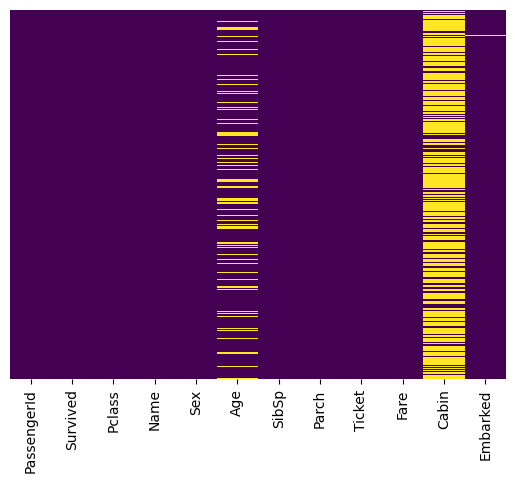

In [166]:
## Checkout the null values
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

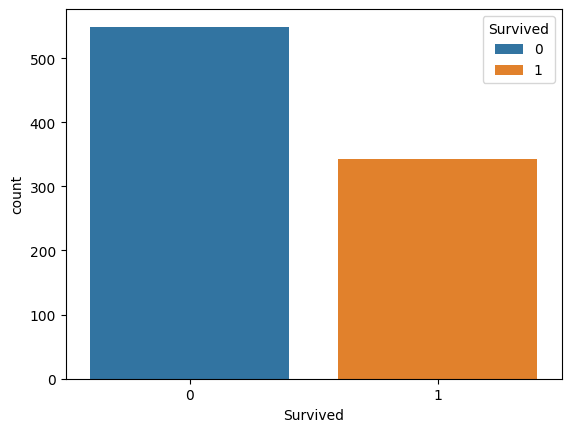

In [167]:
## Survival and deceased ratio
sns.countplot(data=df,x='Survived',hue='Survived')
plt.show()

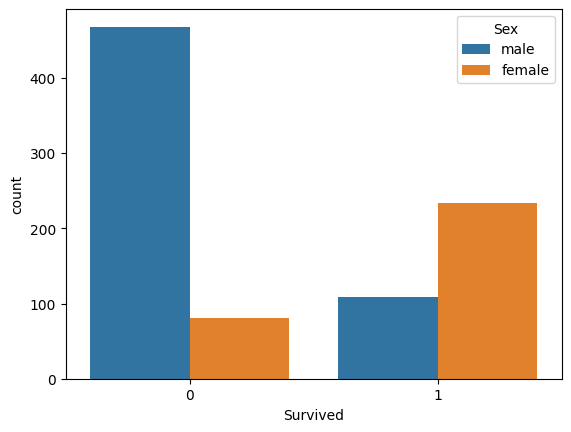

In [168]:
# Survived sex ratio
sns.countplot(data=df,x='Survived',hue='Sex')
plt.show()

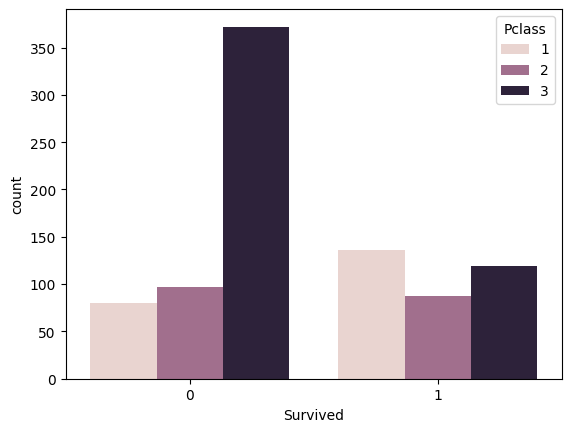

In [169]:
# Survided Pclass ratio
sns.countplot(data=df,x='Survived',hue='Pclass')
plt.show()

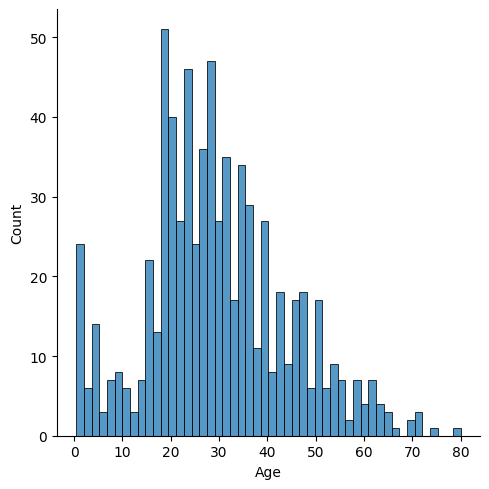

In [170]:
# Age of the passangers
sns.displot(data=df,x='Age',bins=50)
plt.show()

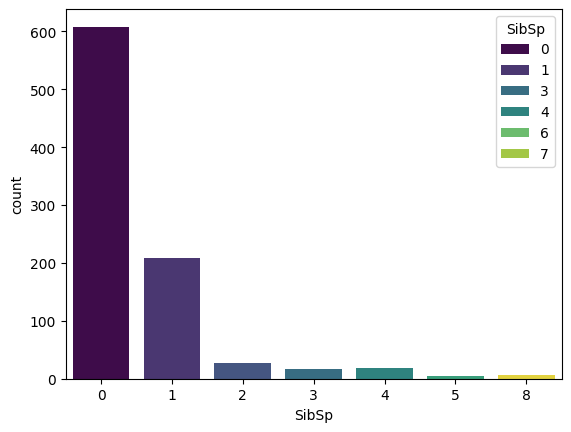

In [171]:
# siblings and spouse
sns.countplot(data=df,x='SibSp',hue='SibSp',palette='viridis')
plt.show()

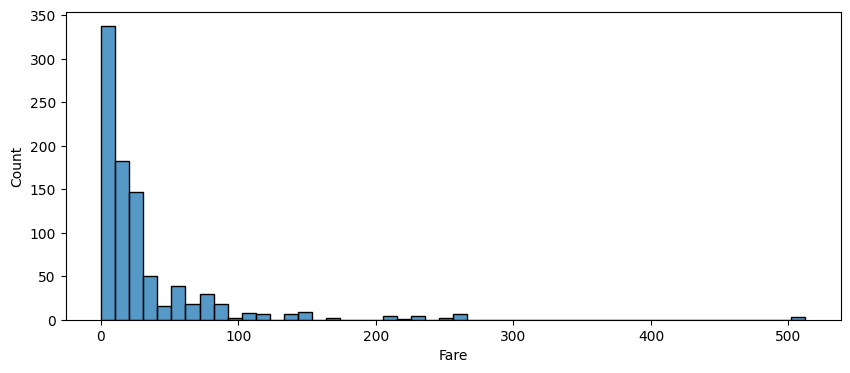

In [172]:
# Fare distribution
plt.figure(figsize=(10,4))
sns.histplot(data=df,x='Fare',bins=50)
plt.show()

## Data Cleaning

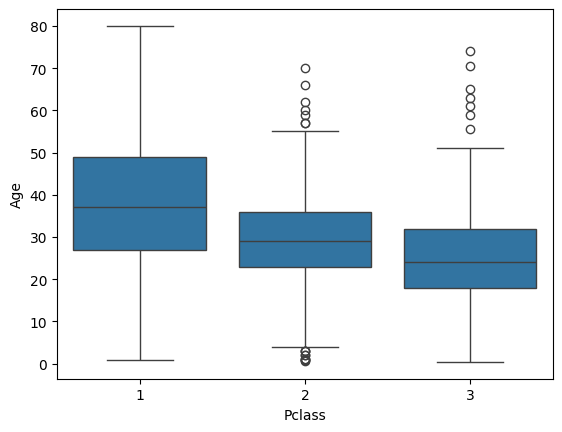

In [173]:
# Filling age column null values
sns.boxplot(data=df,x='Pclass',y='Age')
plt.show()

In [174]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)


<Axes: >

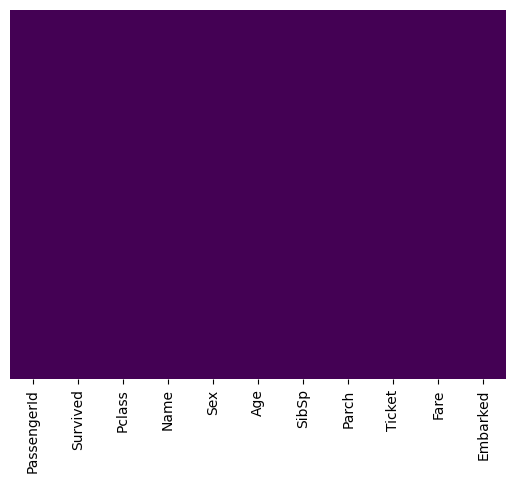

In [175]:
# Null values
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [176]:
# handlling Categorical features
sex = pd.get_dummies(df['Sex'],drop_first=True,dtype=int)
embark = pd.get_dummies(df['Embarked'],drop_first=True,dtype=int)
df = pd.concat([df,sex,embark],axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [177]:
# Drop the Non numerical columns
df.drop(['Name','Sex','Ticket','Embarked','PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [178]:
# Train test split 
X = df.drop('Survived',axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [180]:
# Model Predictions
preds = model.predict(X_test)

In [ ]:
# Model evaluation 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
score=accuracy_score(y_test,preds)
print(score)
print(classification_report(y_test,preds))
print("\n")
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



[[138  29]
 [ 25  75]]
